# Thyroid Prediction

### Problem Statement:-
- To build a classification methodology to predict the type of Thyroid based on the given training data. 

### About Dataset:-

- age - Age of the person

- sex - Male or Female

- on_thyroxine - true or false

- on_antithyroid_medication - true or false

- sick - true or false

- pregnant - true or false

- thyroid_surgery - true or false

- I131_treatment - true or false

- query_hypothyroid - true or false

- query_hyperthyroid -true or false

- lithium - true or false

- goitre - true or false

- tumor - true or false

- hypopituitary- true or false

- psych - true or false

- TSH_measured - true or false

- TSH - thyroid stimulating hormone floating value

- T3_measured - true or false

- T3 - triiodothyronine value

- TT4_measured- true or false

- TT4 - Thyroxine value

- T4U_measured- true or false

- T4U - numerical value

- FTI_measured- true or false

- FTI -Free Thyroxine Index

- TBG_measured- true or false

- TBG -Thyroid-Binding Globulin  value

- referral_source - different sources of referals

- Class - different types of thyroid


In [1]:
# Importing all th Important Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Over sampling to balance the imabalanced data.
from imblearn.over_sampling import RandomOverSampler

#Importing train_test_split to split into traning and testing data.
from sklearn.model_selection import train_test_split

#Importing Randomforestclassifier to create a model.
from sklearn.ensemble import RandomForestClassifier

#Importing Accuracy score and classification report to check the accuracy.
from sklearn.metrics import classification_report, accuracy_score

#Importing the kfold and cross validation.
from sklearn.model_selection import KFold, cross_val_score

#Importing pickel to create a pickel file.
import pickle

In [2]:
# Importing Dataset
df = pd.read_csv("hypothyroid.csv")

In [3]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,negative
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,negative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [5]:
df.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


- There are some Nan vakues in form of "?" so, need to replace them with nan.

In [6]:
#Replacing "?" with nan
df.replace("?", np.nan, inplace=True)

# Taking care of Missing values

In [7]:
#Checking if any missing values
df.isnull().sum()

age                             1
sex                           150
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           369
T3_measured                     0
T3                            769
TT4_measured                    0
TT4                           231
T4U_measured                    0
T4U                           387
FTI_measured                    0
FTI                           385
TBG_measured                    0
TBG                          3772
referral_source                 0
Class         

In [8]:
# Droping TBG because its empty contains 3772 missing values
df.drop(["TBG"], axis=1, inplace=True)

In [9]:
#Dropping missing values
df.dropna(inplace=True)

In [10]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,2.5,t,125,t,1.14,t,109,f,SVHC,negative
4,70,F,f,f,f,f,f,f,f,f,...,1.2,t,61,t,0.87,t,70,f,SVI,negative
7,80,F,f,f,f,f,f,f,f,f,...,0.6,t,80,t,0.7,t,115,f,SVI,negative
8,66,F,f,f,f,f,f,f,f,f,...,2.2,t,123,t,0.93,t,132,f,SVI,negative
9,68,M,f,f,f,f,f,f,f,f,...,1.6,t,83,t,0.89,t,93,f,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,19,F,f,f,f,f,f,f,f,f,...,2.7,t,108,t,1.11,t,97,f,other,compensated_hypothyroid
3768,68,F,f,f,f,f,f,f,f,f,...,2.1,t,124,t,1.08,t,114,f,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,...,1.8,t,112,t,1.07,t,105,f,other,negative
3770,72,M,f,f,f,f,f,f,f,f,...,2,t,82,t,0.94,t,87,f,SVI,negative


In [11]:
df.age.dtype

dtype('O')

In [12]:
#Checking the catagorical features and there unique values
for c in df:
    if df[c].dtype == "O":
        print(df[c].value_counts())
        print("="*50)

59    72
70    69
73    66
60    63
55    63
      ..
2      1
91     1
6      1
94     1
92     1
Name: age, Length: 92, dtype: int64
F    1764
M     879
Name: sex, dtype: int64
f    2377
t     266
Name: on_thyroxine, dtype: int64
f    2619
t      24
Name: query_on_thyroxine, dtype: int64
f    2610
t      33
Name: on_antithyroid_medication, dtype: int64
f    2530
t     113
Name: sick, dtype: int64
f    2602
t      41
Name: pregnant, dtype: int64
f    2610
t      33
Name: thyroid_surgery, dtype: int64
f    2603
t      40
Name: I131_treatment, dtype: int64
f    2497
t     146
Name: query_hypothyroid, dtype: int64
f    2480
t     163
Name: query_hyperthyroid, dtype: int64
f    2629
t      14
Name: lithium, dtype: int64
f    2623
t      20
Name: goitre, dtype: int64
f    2585
t      58
Name: tumor, dtype: int64
f    2642
t       1
Name: hypopituitary, dtype: int64
f    2473
t     170
Name: psych, dtype: int64
t    2643
Name: TSH_measured, dtype: int64
0.2     97
1.3     89
1.1     76
1.5 

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TSH_measured', ylabel='count'>

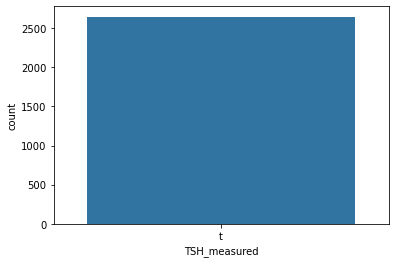

In [13]:
sns.countplot(df["TSH_measured"])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='T3_measured', ylabel='count'>

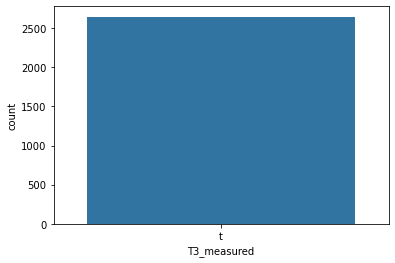

In [14]:
sns.countplot(df["T3_measured"])


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TT4_measured', ylabel='count'>

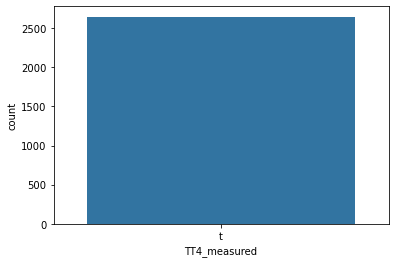

In [15]:
sns.countplot(df["TT4_measured"])


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='T4U_measured', ylabel='count'>

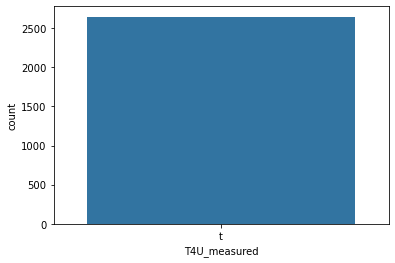

In [16]:
sns.countplot(df["T4U_measured"])


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FTI_measured', ylabel='count'>

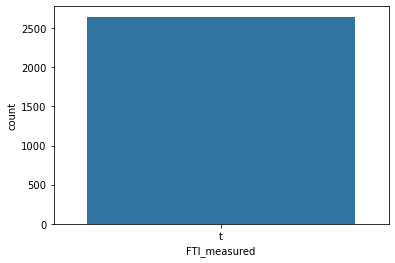

In [17]:
sns.countplot(df["FTI_measured"])


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TBG_measured', ylabel='count'>

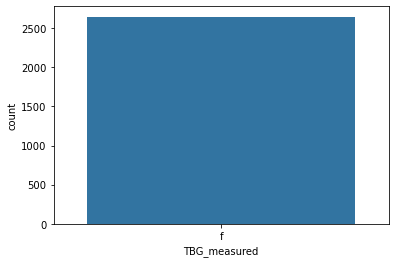

In [18]:
sns.countplot(df["TBG_measured"])

 - Dropping features which only containg one value so need to keep those features.

In [19]:
#Dropping unnecessary features
df.drop(["TSH_measured"], axis=1, inplace=True)
df.drop(["T3_measured"], axis=1, inplace=True)
df.drop(["TT4_measured"], axis=1, inplace=True)
df.drop(["T4U_measured"], axis=1, inplace=True)
df.drop(["FTI_measured"], axis=1, inplace=True)
df.drop(["TBG_measured"], axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2643 entries, 0 to 3771
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        2643 non-null   object
 1   sex                        2643 non-null   object
 2   on_thyroxine               2643 non-null   object
 3   query_on_thyroxine         2643 non-null   object
 4   on_antithyroid_medication  2643 non-null   object
 5   sick                       2643 non-null   object
 6   pregnant                   2643 non-null   object
 7   thyroid_surgery            2643 non-null   object
 8   I131_treatment             2643 non-null   object
 9   query_hypothyroid          2643 non-null   object
 10  query_hyperthyroid         2643 non-null   object
 11  lithium                    2643 non-null   object
 12  goitre                     2643 non-null   object
 13  tumor                      2643 non-null   object
 14  hypopitu

# Taking Care of Catagorical Data


In [21]:
# Using loop to gaet those features which only contains 2 catagorical data
list_of_catagorical_columns = []
for c in df:
    if df[c].dtype == "O":
        print(df[c].value_counts())
        print("="*50)
        list_of_catagorical_columns.append(c)

59    72
70    69
73    66
60    63
55    63
      ..
2      1
91     1
6      1
94     1
92     1
Name: age, Length: 92, dtype: int64
F    1764
M     879
Name: sex, dtype: int64
f    2377
t     266
Name: on_thyroxine, dtype: int64
f    2619
t      24
Name: query_on_thyroxine, dtype: int64
f    2610
t      33
Name: on_antithyroid_medication, dtype: int64
f    2530
t     113
Name: sick, dtype: int64
f    2602
t      41
Name: pregnant, dtype: int64
f    2610
t      33
Name: thyroid_surgery, dtype: int64
f    2603
t      40
Name: I131_treatment, dtype: int64
f    2497
t     146
Name: query_hypothyroid, dtype: int64
f    2480
t     163
Name: query_hyperthyroid, dtype: int64
f    2629
t      14
Name: lithium, dtype: int64
f    2623
t      20
Name: goitre, dtype: int64
f    2585
t      58
Name: tumor, dtype: int64
f    2642
t       1
Name: hypopituitary, dtype: int64
f    2473
t     170
Name: psych, dtype: int64
0.2     97
1.3     89
1.1     76
1.5     70
1.6     69
        ..
0.23     1
143

In [22]:
list_of_catagorical_columns

['age',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH',
 'T3',
 'TT4',
 'T4U',
 'FTI',
 'referral_source',
 'Class']

In [23]:
# This columns only have those features which have 2 catagorical data
list_of_catagorical_columns = ['sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',]

In [24]:
# OneHotEncoding 
for i in list_of_catagorical_columns:
    df[i] = pd.get_dummies(df[i], drop_first=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2643 entries, 0 to 3771
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        2643 non-null   object
 1   sex                        2643 non-null   uint8 
 2   on_thyroxine               2643 non-null   uint8 
 3   query_on_thyroxine         2643 non-null   uint8 
 4   on_antithyroid_medication  2643 non-null   uint8 
 5   sick                       2643 non-null   uint8 
 6   pregnant                   2643 non-null   uint8 
 7   thyroid_surgery            2643 non-null   uint8 
 8   I131_treatment             2643 non-null   uint8 
 9   query_hypothyroid          2643 non-null   uint8 
 10  query_hyperthyroid         2643 non-null   uint8 
 11  lithium                    2643 non-null   uint8 
 12  goitre                     2643 non-null   uint8 
 13  tumor                      2643 non-null   uint8 
 14  hypopitu

In [26]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,1.3,2.5,125,1.14,109,SVHC,negative
4,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0.72,1.2,61,0.87,70,SVI,negative
7,80,0,0,0,0,0,0,0,0,0,...,0,0,0,2.2,0.6,80,0.7,115,SVI,negative
8,66,0,0,0,0,0,0,0,0,0,...,1,0,0,0.6,2.2,123,0.93,132,SVI,negative
9,68,1,0,0,0,0,0,0,0,0,...,0,0,0,2.4,1.6,83,0.89,93,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,19,0,0,0,0,0,0,0,0,0,...,0,0,0,8.8,2.7,108,1.11,97,other,compensated_hypothyroid
3768,68,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2.1,124,1.08,114,SVI,negative
3769,74,0,0,0,0,0,0,0,0,0,...,0,0,0,5.1,1.8,112,1.07,105,other,negative
3770,72,1,0,0,0,0,0,0,0,0,...,0,0,0,0.7,2,82,0.94,87,SVI,negative


In [27]:
list_of_catagorical_columns = []
for c in df:
    if df[c].dtype == "O":
        print(df[c].value_counts())
        print("="*50)
        list_of_catagorical_columns.append(c)

59    72
70    69
73    66
60    63
55    63
      ..
2      1
91     1
6      1
94     1
92     1
Name: age, Length: 92, dtype: int64
0.2     97
1.3     89
1.1     76
1.5     70
1.6     69
        ..
0.23     1
143      1
0.49     1
10.3     1
40       1
Name: TSH, Length: 270, dtype: int64
2      206
1.8    182
2.2    175
2.3    169
1.9    162
      ... 
4.6      1
5        1
5.2      1
4.8      1
5.7      1
Name: T3, Length: 67, dtype: int64
101    52
103    50
93     50
102    48
94     44
       ..
27      1
289     1
240     1
43      1
216     1
Name: TT4, Length: 228, dtype: int64
0.99    78
1.01    72
0.89    72
0.92    71
1.02    69
        ..
1.71     1
1.76     1
1.56     1
0.31     1
0.25     1
Name: T4U, Length: 141, dtype: int64
100    56
93     56
114    53
96     52
104    52
       ..
232     1
175     1
235     1
48      1
35      1
Name: FTI, Length: 219, dtype: int64
other    1237
SVI       929
SVHC      359
STMW       84
SVHD       34
Name: referral_source, dtype:

In [28]:
list_of_catagorical_columns

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'referral_source', 'Class']

In [29]:
# this list contains the reamining features which are object dtype need to convert them into numeric dtype
list_of_catagorical_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [30]:
#Using loop to convert the dtype of object in list
for i in list_of_catagorical_columns:
    df[i] = pd.to_numeric(df[i])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2643 entries, 0 to 3771
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2643 non-null   int64  
 1   sex                        2643 non-null   uint8  
 2   on_thyroxine               2643 non-null   uint8  
 3   query_on_thyroxine         2643 non-null   uint8  
 4   on_antithyroid_medication  2643 non-null   uint8  
 5   sick                       2643 non-null   uint8  
 6   pregnant                   2643 non-null   uint8  
 7   thyroid_surgery            2643 non-null   uint8  
 8   I131_treatment             2643 non-null   uint8  
 9   query_hypothyroid          2643 non-null   uint8  
 10  query_hyperthyroid         2643 non-null   uint8  
 11  lithium                    2643 non-null   uint8  
 12  goitre                     2643 non-null   uint8  
 13  tumor                      2643 non-null   uint8

In [32]:
#Dropping the referal source feature
df.drop(["referral_source"], axis=1, inplace=True)

In [33]:
# Replacing the values "negative":0, "compensated_hypothyroid":1, "primary_hypothyroid":2, "secondary_hypothyroid":3 from class feature
df["Class"].replace({"negative":0, "compensated_hypothyroid":1, "primary_hypothyroid":2, "secondary_hypothyroid":3}, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2643 entries, 0 to 3771
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2643 non-null   int64  
 1   sex                        2643 non-null   uint8  
 2   on_thyroxine               2643 non-null   uint8  
 3   query_on_thyroxine         2643 non-null   uint8  
 4   on_antithyroid_medication  2643 non-null   uint8  
 5   sick                       2643 non-null   uint8  
 6   pregnant                   2643 non-null   uint8  
 7   thyroid_surgery            2643 non-null   uint8  
 8   I131_treatment             2643 non-null   uint8  
 9   query_hypothyroid          2643 non-null   uint8  
 10  query_hyperthyroid         2643 non-null   uint8  
 11  lithium                    2643 non-null   uint8  
 12  goitre                     2643 non-null   uint8  
 13  tumor                      2643 non-null   uint8

In [35]:
df["sex"].dtype

dtype('uint8')

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='on_thyroxine', ylabel='count'>

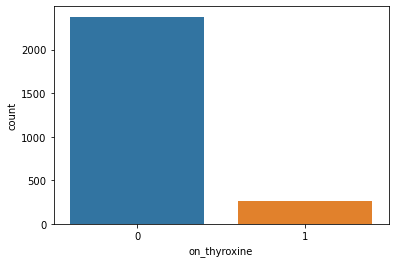

In [36]:
sns.countplot(df["on_thyroxine"])

In [37]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.30,2.5,125.0,1.14,109.0,0
4,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72,1.2,61.0,0.87,70.0,0
7,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.20,0.6,80.0,0.70,115.0,0
8,66,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0.60,2.2,123.0,0.93,132.0,0
9,68,1,0,0,0,0,0,0,0,0,...,0,0,0,0,2.40,1.6,83.0,0.89,93.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,8.80,2.7,108.0,1.11,97.0,1
3768,68,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.00,2.1,124.0,1.08,114.0,0
3769,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5.10,1.8,112.0,1.07,105.0,0
3770,72,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.70,2.0,82.0,0.94,87.0,0


In [38]:
df[df["pregnant"]==1]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
30,34,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0.035,2.5,119.0,1.55,76.0,0
199,32,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0.025,3.7,139.0,1.34,104.0,0
240,19,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0.450,3.2,130.0,1.83,71.0,0
366,32,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0.500,3.0,167.0,1.82,92.0,0
486,29,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0.100,3.1,142.0,1.77,80.0,0
599,34,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0.200,5.0,223.0,1.69,131.0,0
676,21,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0.200,2.5,108.0,1.13,96.0,0
778,34,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0.060,4.7,157.0,1.68,94.0,0
885,36,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0.025,2.9,194.0,1.63,119.0,0
994,34,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0.040,2.9,144.0,1.58,91.0,0


# Paiplot

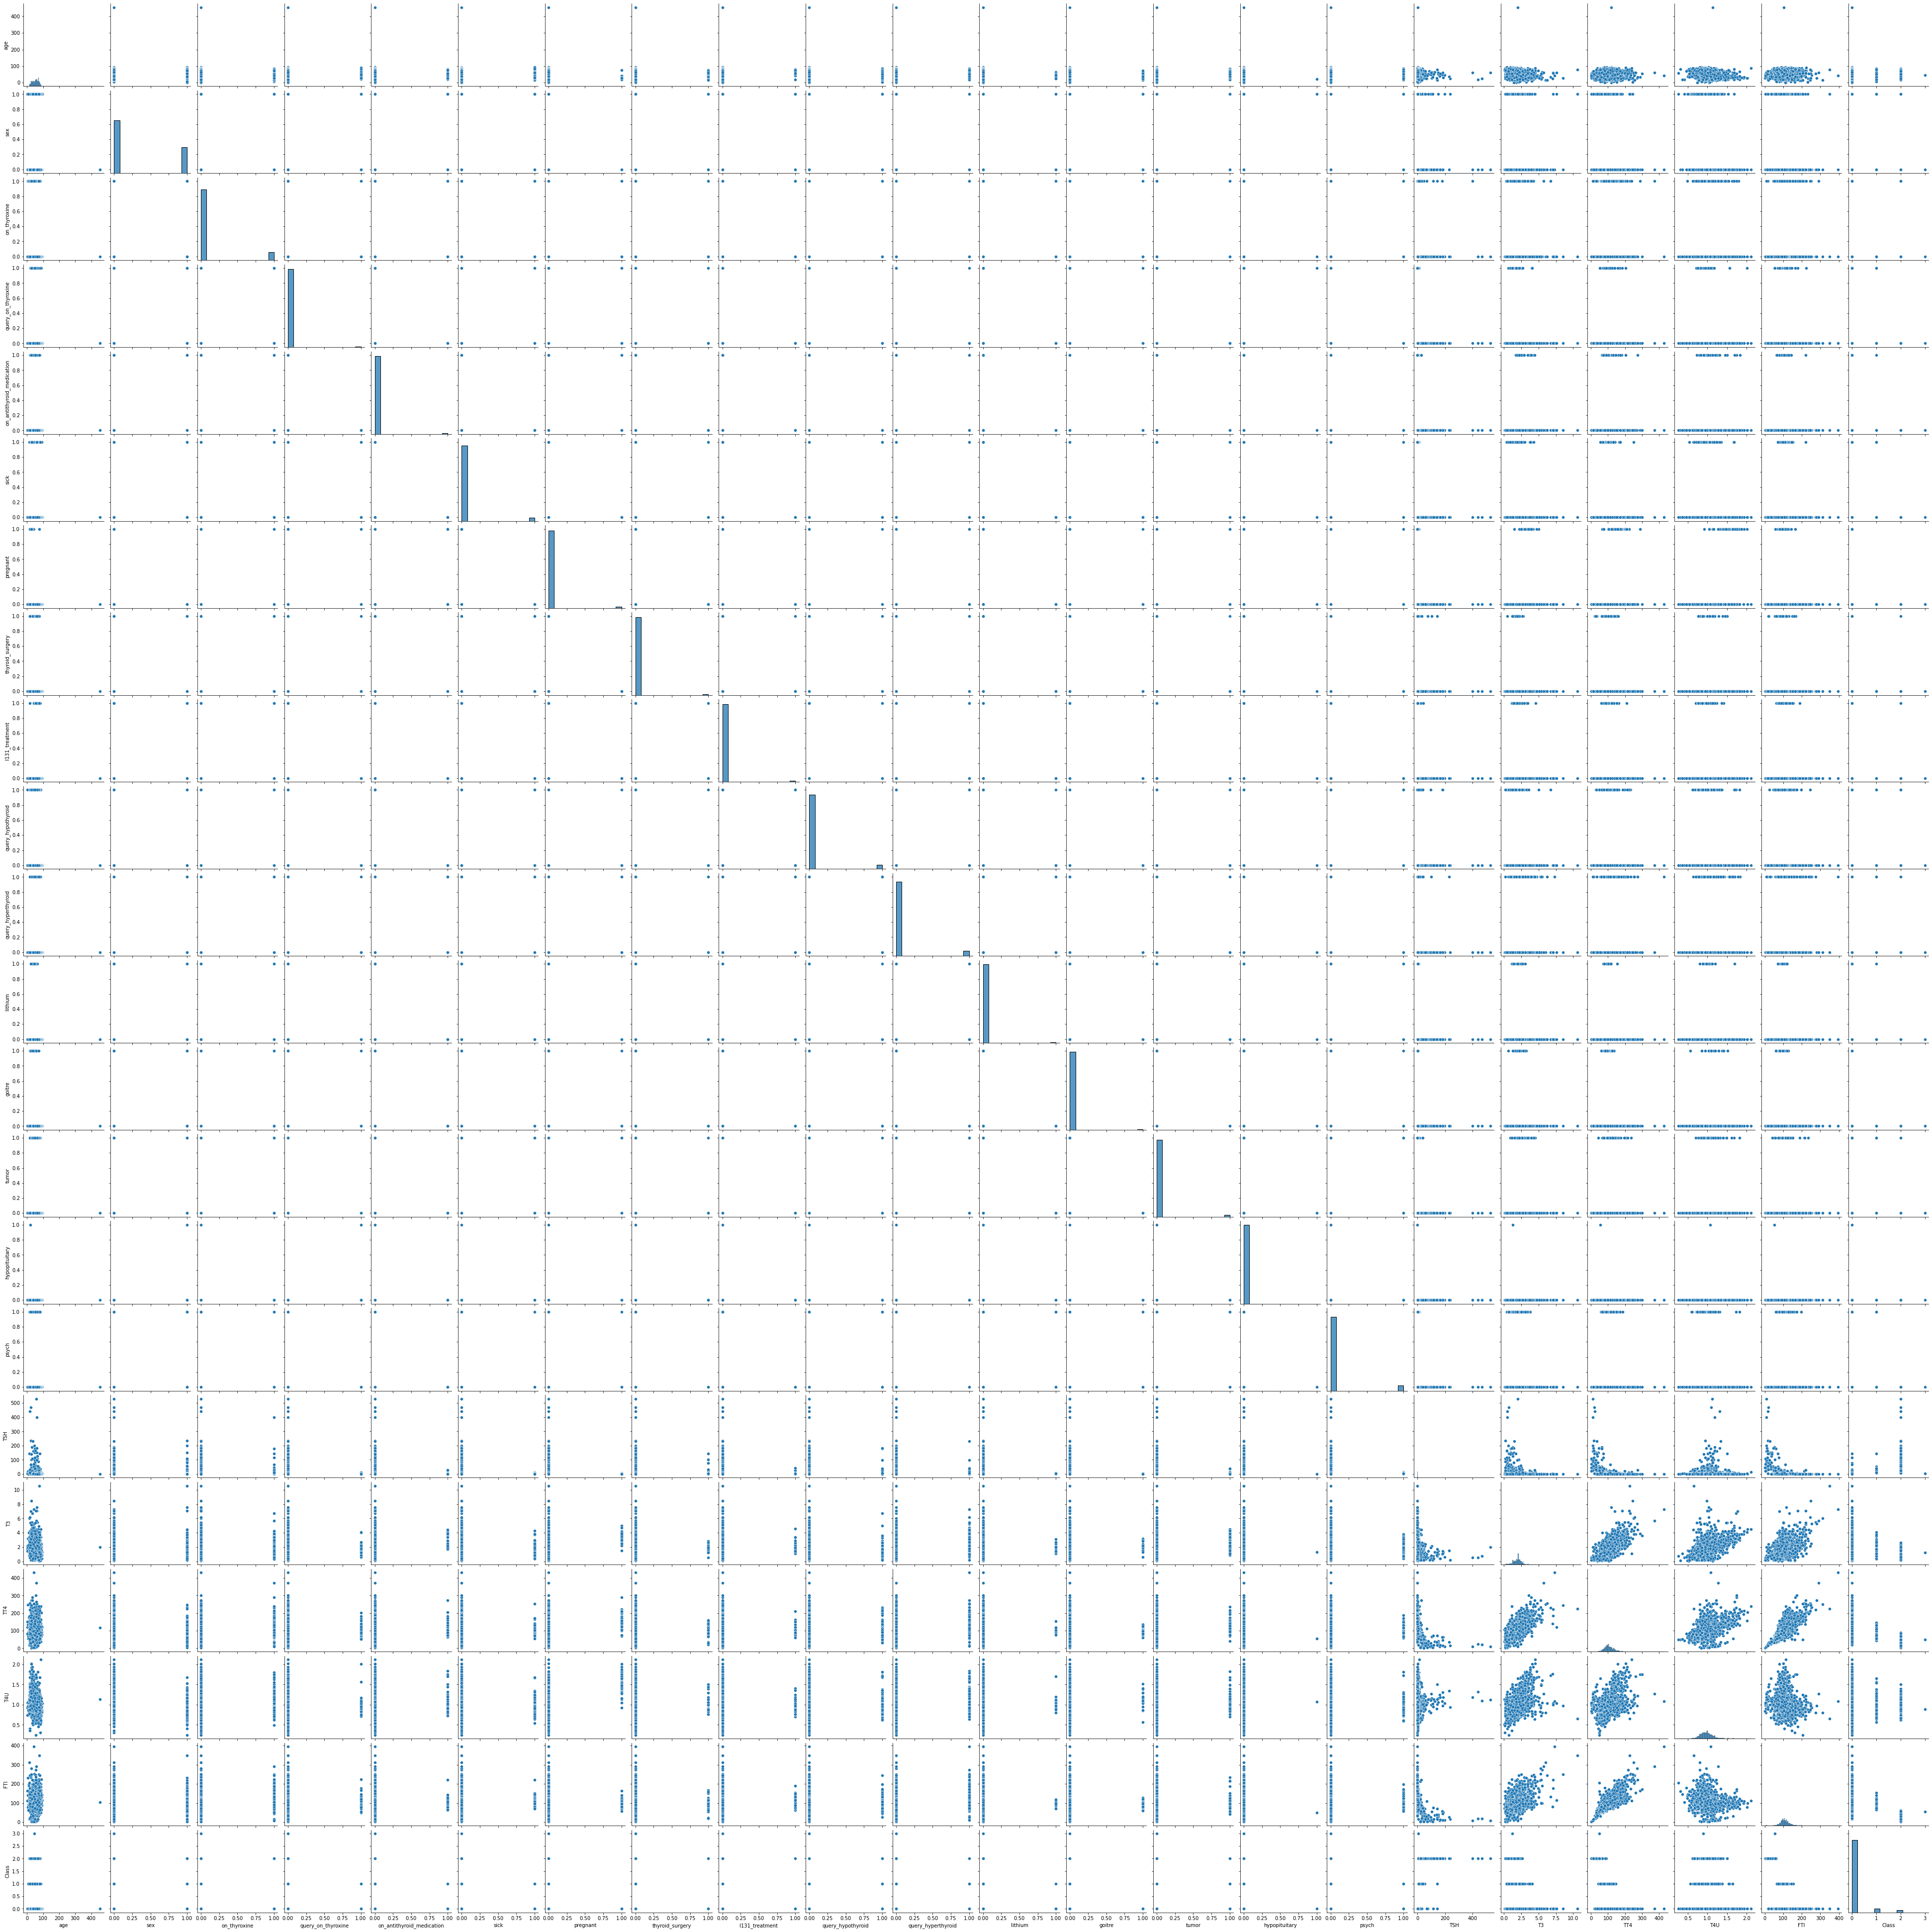

In [39]:
sns.pairplot(df)

# Idependent and Dependent Variable.
- X as independent variable.
- y as dependent/target variable.

In [40]:
X = df.iloc[:, :21]   # independent
y = df.iloc[:, 21]    # Dependent

In [41]:
X

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1.30,2.5,125.0,1.14,109.0
4,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.72,1.2,61.0,0.87,70.0
7,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.20,0.6,80.0,0.70,115.0
8,66,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.60,2.2,123.0,0.93,132.0
9,68,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.40,1.6,83.0,0.89,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,8.80,2.7,108.0,1.11,97.0
3768,68,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1.00,2.1,124.0,1.08,114.0
3769,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5.10,1.8,112.0,1.07,105.0
3770,72,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.70,2.0,82.0,0.94,87.0


In [42]:
X.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI'],
      dtype='object')

In [43]:
y

0       0
4       0
7       0
8       0
9       0
       ..
3766    1
3768    0
3769    0
3770    0
3771    0
Name: Class, Length: 2643, dtype: int64

# Taking care of imbalanced data

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

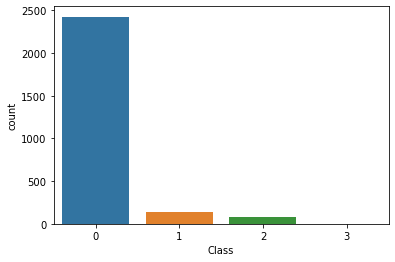

In [44]:
#Checking the imabalanced data
sns.countplot(y)

In [45]:
y.value_counts()

0    2427
1     136
2      79
3       1
Name: Class, dtype: int64

In [46]:
# Using Over sampling

# strategy = {0:2427, 1:1200, 2:700, 3:300}

os = RandomOverSampler()
X_res, y_res = os.fit_resample(X, y)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

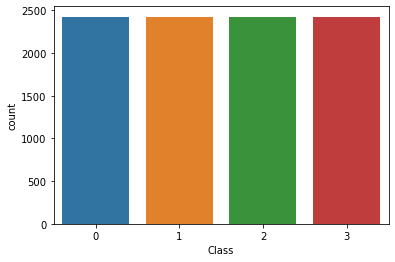

In [47]:
# Result after balancing the data
sns.countplot(y_res)

# Spliting into traing and testing data

In [48]:
# sPliting into traing and testing 
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(X_test.shape)

(7766, 21)
(1942, 21)
(7766,)
(1942, 21)


# Creating Model
- Using RandomForestClassifier because it was giving more accuracy.

In [50]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
# Predicting using testing data
y_pred = rf.predict(X_test)

# Checking the accuracy

In [52]:
 accuracy_score(y_test, y_pred)

0.9989701338825953

In [53]:
rf.score(X_train, y_train)

1.0

In [54]:
rf.score(X_test, y_test)

0.9989701338825953

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       487
           1       1.00      1.00      1.00       516
           2       1.00      1.00      1.00       462
           3       1.00      1.00      1.00       477

    accuracy                           1.00      1942
   macro avg       1.00      1.00      1.00      1942
weighted avg       1.00      1.00      1.00      1942



# Cross fold validation

In [56]:
cv1 = KFold(n_splits=10, random_state=1, shuffle=True)
scores1 = cross_val_score(rf, X_res, y_res, scoring='accuracy', cv=cv1)

In [57]:
scores1

array([0.99897013, 1.        , 0.99794027, 0.99897013, 1.        ,
       1.        , 0.99897013, 0.99897013, 0.99896907, 1.        ])

# Hyperparameter tunning

In [58]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [59]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [60]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [61]:
# Fit the random search model
# rf_random.fit(X_train, y_train)

In [63]:
# rf_random.best_params_
'''
{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

'''

"\n{'n_estimators': 800,\n 'min_samples_split': 5,\n 'min_samples_leaf': 1,\n 'max_features': 'sqrt',\n 'max_depth': 100,\n 'bootstrap': False}\n\n"

In [64]:
rf_random = RandomForestClassifier(n_estimators = 800,
min_samples_split=5,
min_samples_leaf=1,
max_features='sqrt',
max_depth=100,
bootstrap=False)
rf_random.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=100, max_features='sqrt',
                       min_samples_split=5, n_estimators=800)

In [65]:
y_preds = rf_random.predict(X_test)

In [66]:
accuracy_score(y_test, y_preds)

1.0

In [67]:
cv1 = KFold(n_splits=10, random_state=1, shuffle=True)
scores1 = cross_val_score(rf_random, X_res, y_res, scoring='accuracy', cv=cv1)

In [68]:
scores1

array([0.99897013, 1.        , 0.99794027, 0.99897013, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       487
           1       1.00      1.00      1.00       516
           2       1.00      1.00      1.00       462
           3       1.00      1.00      1.00       477

    accuracy                           1.00      1942
   macro avg       1.00      1.00      1.00      1942
weighted avg       1.00      1.00      1.00      1942



In [70]:
rf_random.score(X_train, y_train)

1.0

In [71]:
rf_random.score(X_test, y_test)

1.0

# Creating a pickel file

In [72]:
### Create a Pickle file 
pickle_out = open("thyroid_classifier.pkl","wb")
pickle.dump(rf_random, pickle_out)
pickle_out.close()